# US BABY NAMES

## Keywords:
String formatting, concatenation of dataframes, ignore_index, aggregation through groupby and pivot_table,

In [136]:
%reset -f
import pandas as pd
import numpy as np

In [137]:
# Start loading names

names1880 = pd.read_csv('names/yob1880.txt', names = ['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [138]:
# Group the names by sex

names1880.groupby('sex').head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
942,John,M,9655
943,William,M,9532
944,James,M,5927
945,Charles,M,5348
946,George,M,5126


In [139]:
# Put together the data from all the files into a single DataFrame
years = range(1880,2011)

pieces = []
columns = ['name','sex','births']

for i in years:
    path = 'names/yob{}.txt'.format(i)
    frame = pd.read_csv(path, names = columns)
    frame['year'] = i
    pieces.append(frame)
    
    
# Now Concatenate all the dataframes together
names = pd.concat(pieces, ignore_index=True)

names


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692251,Zymaire,M,5,2010
1692252,Zyonne,M,5,2010
1692253,Zyquarius,M,5,2010
1692254,Zyran,M,5,2010


In [140]:
total_births = pd.pivot_table(names, values = 'births', index='year', columns='sex', aggfunc=np.sum)
total_births.tail()

sex,F,M
year,,
2006,1900092,2054077
2007,1921385,2074138
2008,1889483,2038689
2009,1835518,1981950
2010,1775857,1917024


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

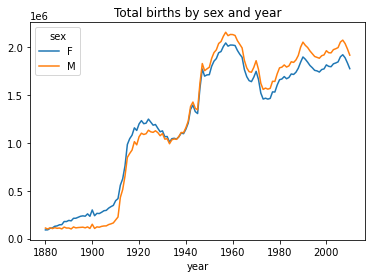

In [141]:
total_births.plot(title='Total births by sex and year')

In [142]:
def add_prop(group):
    # Integer division floors    
    births = group['births'].astype(float)
    
    group['prop'] = births / births.sum()    
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names



,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692251,Zymaire,M,5,2010,0.000003
1692252,Zyonne,M,5,2010,0.000003
1692253,Zyquarius,M,5,2010,0.000003
1692254,Zyran,M,5,2010,0.000003


In [143]:
# Top 1000 names for each year

def get_top1000(group):    
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])

top1000 = grouped.apply(get_top1000)

# If you prefer a do-it-yourself approach, you could also do
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [144]:
# Splitting the data and analysing trends

boys = top1000[top1000['sex']=='M']

girls = top1000[top1000['sex']=='F']

In [145]:
total_births = pd.pivot_table(names, values = 'births', index='year', columns='name', aggfunc=np.sum)

total_births

name,Aaban,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyrus,Zysean,Zyshaun,Zyshawn,Zyshon,Zyshonne,Zytavious,Zyvion,Zyyanna,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,NaN,NaN,9.0,NaN,14.0,56.0,NaN,5.0,NaN,...,NaN,NaN,5.0,5.0,NaN,NaN,7.0,NaN,NaN,NaN
2007,5.0,NaN,NaN,8.0,8.0,13.0,157.0,NaN,NaN,NaN,...,NaN,NaN,7.0,11.0,NaN,NaN,6.0,NaN,NaN,NaN
2008,NaN,NaN,5.0,6.0,22.0,13.0,957.0,NaN,NaN,NaN,...,9.0,NaN,6.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

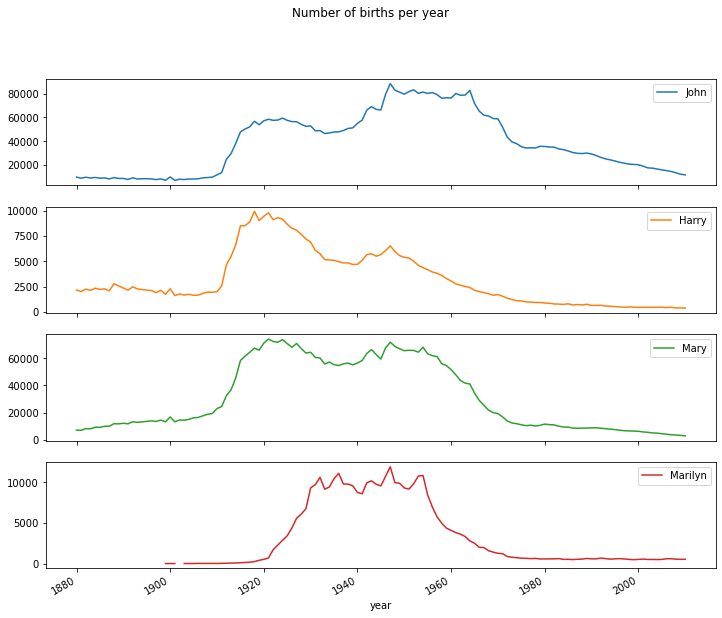

In [146]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [147]:
 table = pd.pivot_table(top1000, values = 'prop', index='year', columns='sex', aggfunc=np.sum)

table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753047,0.860292
2007,0.745850,0.855081
2008,0.740811,0.849970


<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

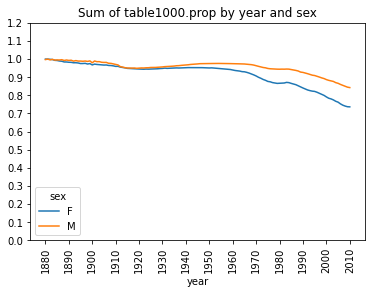

In [148]:
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10),rot=90)

In [149]:
# Finding the number of popular names up to 50%

df = boys[boys.year == 2010]

df

,name,sex,births,year,prop
260877,Jacob,M,22136,2010,0.011547
260878,Ethan,M,18004,2010,0.009392
260879,Michael,M,17359,2010,0.009055
260880,Jayden,M,17185,2010,0.008964
260881,William,M,17054,2010,0.008896
...,...,...,...,...,...
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102
261875,Enoch,M,196,2010,0.000102


In [150]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

prop_cumsum[:10]


# Find the place where insertion of 0.5 would keep the list in a sorted order
prop_cumsum.searchsorted(0.5)

116

In [153]:
#  By con-trast, in 1900 this number was much smaller:

# It should now be fairly straightforward to apply this operation to each year/sex com-bination; 
# groupby those fields and apply a function returning the count for each group:

def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

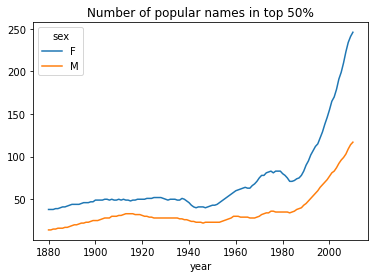

In [154]:
diversity.plot(title="Number of popular names in top 50%")